In [1]:
import matplotlib.pyplot as plt
import numpy as np

import ehrapy as ep

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
current_notebook_dir = %pwd
_TEST_IMAGE_PATH = f"{current_notebook_dir}/../plot/_images"

In [9]:
adata = ep.dt.mimic_2(encoded=True).copy()

In [10]:
ep.pp.knn_impute(adata)
ep.pp.log_norm(adata, offset=1)
ep.pp.neighbors(adata, method="gauss")
ep.tl.leiden(adata, resolution=0.5, key_added="leiden_0_5")
ep.tl.diffmap(adata, n_comps=10)

adata.uns["iroot"] = np.flatnonzero(adata.obs["leiden_0_5"] == "0")[0]

ep.tl.dpt(adata, n_branchings=3)

shifting branching point away from maximal kendall-tau correlation (suppress this with `allow_kendall_tau_shift=False`)


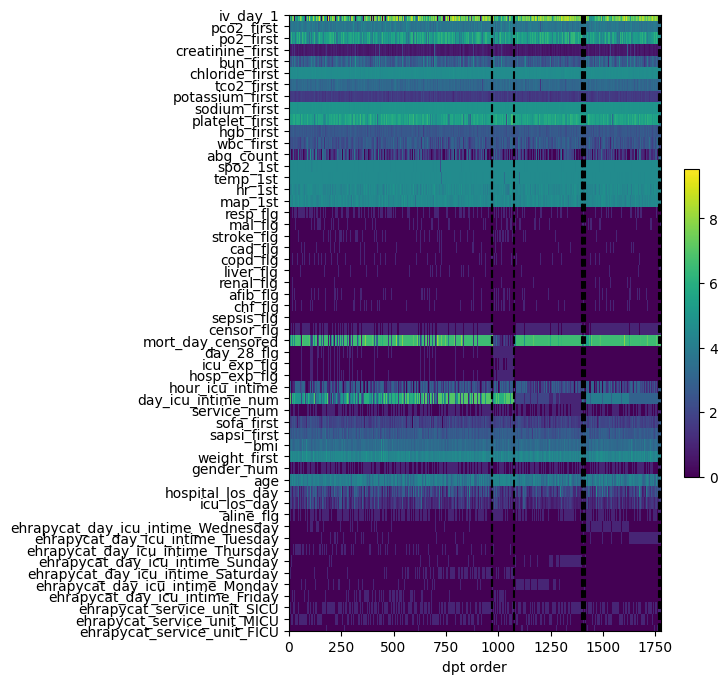

In [23]:
ep.pl.dpt_timeseries(adata, show=False)
fig = plt.gcf()

In [24]:
fig.savefig(f"{_TEST_IMAGE_PATH}/dpt_timeseries_expected.png", dpi=80)